# Clustering Excersise
Use the artist_tags  downloaddata to cluster artists.

Note: The goal of clustering is to group cases so that similarity is maximized within clusters and minimized between clusters. 

Exercise Tasks: 

- Compare the hierarchical and kmeans clustering algorithms.

- Identify the best # of clusters. How robust is this number across methods?

- Examine the features and artists associated with each cluster. Do the clusters make sense? How would you characterize them?

- Go back and change the # of clusters (increase & decrease). How do your interpretations of the clusters change?

- What insights do you gain about popular music?

- One direction to consider: What types of artists (i.e., clusters) are there? These can be considered proven pathways to success. What opportunities might there be between/outside of existing clusters? These might be considered “blue ocean” opportunities.

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [42]:
# load and clean data
df = pd.read_csv('artist_tags_big.csv')
print(df.shape, df.columns.to_list(),'\n')
df.head()


(153, 59) ['artist', '00s', '60s', '70s', '80s', '90s', 'acoustic', 'alternative', 'alternative rock', 'american', 'blues', 'british', 'britpop', 'canadian', 'chillout', 'classic rock', 'country', 'dance', 'downtempo', 'electronic', 'electronica', 'electropop', 'experimental', 'female vocalists', 'folk', 'funk', 'grunge', 'hard rock', 'heavy metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indie pop', 'indie rock', 'industrial', 'jazz', 'male vocalists', 'metal', 'new wave', 'nu metal', 'pop', 'pop punk', 'pop rock', 'post-punk', 'progressive rock', 'psychedelic', 'psychedelic rock', 'punk', 'punk rock', 'r&b', 'rap', 'rnb', 'rock', 'seen live', 'singer-songwriter', 'soul', 'trip-hop', 'usa'] 



,artist,00s,60s,70s,80s,90s,acoustic,alternative,alternative rock,american,...,punk rock,r&b,rap,rnb,rock,seen live,singer-songwriter,soul,trip-hop,usa
0,2Pac,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30+Seconds+to+Mars,0.0,0.0,0.0,0.0,0.0,0.0,63.0,100.0,6.0,...,0.0,0.0,0.0,0.0,79.0,27.0,0.0,0.0,0.0,0.0
2,AC/DC,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,57.0,8.0,0.0,0.0,0.0,0.0
3,Adele,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,100.0,0.0,0.0
4,Aerosmith,0.0,0.0,30.0,38.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,100.0,12.0,0.0,0.0,0.0,0.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artist             153 non-null    object 
 1   00s                153 non-null    float64
 2   60s                153 non-null    float64
 3   70s                153 non-null    float64
 4   80s                153 non-null    float64
 5   90s                153 non-null    float64
 6   acoustic           153 non-null    float64
 7   alternative        153 non-null    float64
 8   alternative rock   153 non-null    float64
 9   american           153 non-null    float64
 10  blues              153 non-null    float64
 11  british            153 non-null    float64
 12  britpop            153 non-null    float64
 13  canadian           153 non-null    float64
 14  chillout           153 non-null    float64
 15  classic rock       153 non-null    float64
 16  country            153 non

In [44]:
df.describe()

,00s,60s,70s,80s,90s,acoustic,alternative,alternative rock,american,blues,...,punk rock,r&b,rap,rnb,rock,seen live,singer-songwriter,soul,trip-hop,usa
count,153.000000,153.000000,153.000000,153.000000,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.130719,1.797386,1.509804,5.960784,1.27451,2.908497,23.542484,13.098039,4.124183,3.032680,...,1.823529,1.529412,6.366013,8.320261,35.692810,19.915033,7.830065,8.633987,1.869281,0.235294
std,0.929720,9.681344,6.093696,16.820211,5.06047,14.462911,31.601963,25.746171,5.612861,12.261632,...,12.720744,6.404212,21.457041,22.867080,38.475433,19.217230,20.437900,25.599073,11.332123,1.291494
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,16.000000,17.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,47.000000,13.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,68.000000,30.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,85.000000,47.000000,95.000000,41.00000,100.000000,100.000000,100.000000,32.000000,100.000000,...,100.000000,58.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,8.000000


In [45]:
# select features to cluster and normalize
from sklearn.preprocessing import normalize

cols = df.columns.to_list()[1:]
print(cols)
X2 = df[cols]
#X2_scaled = scaler.fit_transform(X2)
X2_scaled = normalize(X2)
print('\ntype of scaled data:', type(X2_scaled))

# put numpy array back into dataframe to inspect it
tmp = pd.DataFrame(X2_scaled, columns=cols)
tmp.describe()

['00s', '60s', '70s', '80s', '90s', 'acoustic', 'alternative', 'alternative rock', 'american', 'blues', 'british', 'britpop', 'canadian', 'chillout', 'classic rock', 'country', 'dance', 'downtempo', 'electronic', 'electronica', 'electropop', 'experimental', 'female vocalists', 'folk', 'funk', 'grunge', 'hard rock', 'heavy metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indie pop', 'indie rock', 'industrial', 'jazz', 'male vocalists', 'metal', 'new wave', 'nu metal', 'pop', 'pop punk', 'pop rock', 'post-punk', 'progressive rock', 'psychedelic', 'psychedelic rock', 'punk', 'punk rock', 'r&b', 'rap', 'rnb', 'rock', 'seen live', 'singer-songwriter', 'soul', 'trip-hop', 'usa']

type of scaled data: <class 'numpy.ndarray'>


,00s,60s,70s,80s,90s,acoustic,alternative,alternative rock,american,blues,...,punk rock,r&b,rap,rnb,rock,seen live,singer-songwriter,soul,trip-hop,usa
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.000896,0.013921,0.014445,0.040307,0.008520,0.018364,0.140759,0.078841,0.027392,0.020871,...,0.011665,0.010647,0.045136,0.058489,0.227219,0.128178,0.049406,0.059839,0.012161,0.001602
std,0.006409,0.068764,0.075559,0.108851,0.033487,0.088445,0.182454,0.154299,0.037948,0.082530,...,0.081090,0.042884,0.152785,0.157512,0.243565,0.122189,0.126259,0.178939,0.076396,0.008967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.041575,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033746,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.111850,0.117520,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310650,0.087818,0.046686,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.439081,0.194731,0.000000,0.000000,0.000000,0.000000
max,0.052920,0.496338,0.805614,0.489984,0.225510,0.640198,0.631081,0.677161,0.215377,0.557546,...,0.626298,0.338476,0.756686,0.748272,0.827238,0.758774,0.598577,0.895538,0.748209,0.065477


# Hierarchical Clustering 
(agglomerative and divisive) 

- Segment the data step-by-step into nested hierarchy of clusters 

In [59]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hier
print(dir(hier))

['ClusterNode', 'ClusterWarning', '_EUCLIDEAN_METHODS', '_LINKAGE_METHODS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_append_contraction_marks', '_append_contraction_marks_sub', '_append_nonsingleton_leaf_node', '_append_singleton_leaf_node', '_check_hierarchy_not_all_clusters_used', '_check_hierarchy_uses_cluster_before_formed', '_check_hierarchy_uses_cluster_more_than_once', '_cnode_bare', '_cnode_type', '_convert_to_bool', '_convert_to_double', '_copy_array_if_base_present', '_copy_arrays_if_base_present', '_dendrogram_calculate_info', '_drotation', '_drotationsortedkeys', '_dtextsizes', '_dtextsortedkeys', '_get_tick_rotation', '_get_tick_text_size', '_hierarchy', '_link_line_colors', '_link_line_colors_default', '_optimal_leaf_ordering', '_order_cluster_tree', '_plot_dendrogram', '_randdm', '_remove_dups', '_warning', 'average', 'bisect', 'centroid', 'complete', 'cophenet', 'correspond', 'cut_tree', 'dend

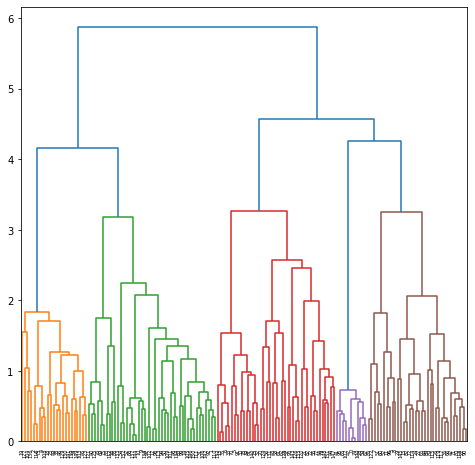

In [47]:
# create cluster model and output to dendrogram

# hierarchical clustering w/ Euclidean distance & Ward linkage
clmod = hier.linkage(X2_scaled, metric = 'euclidean', method='ward')

# dendrogram
plt.figure(figsize=(8, 8))
hier.dendrogram(clmod)
plt.show()

Looking at the diagram it seems that the best solution is around 5 clusters, after that the variation becoem much smaller. 

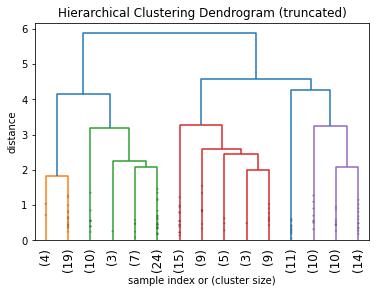

In [48]:
# truncate dendrogram

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
hier.dendrogram(
    clmod,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=15,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    )
plt.show()

This graph is looking at the first 15 clusters. 

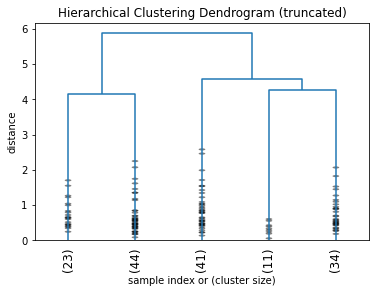

In [65]:
# truncate dendrogram

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
hier.dendrogram(
    clmod,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    )
plt.show()

This visual only includes 5 clusters 

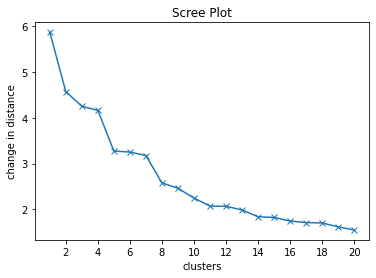

In [49]:
# generate scree plot
last = clmod[-20:, 2] # look at 1-20 cluster solutions
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev, marker='x')
plt.title('Scree Plot')
plt.ylabel('change in distance')
plt.xlabel('clusters')
plt.xticks(np.arange(2, 21, step=2))
plt.show()

From this visual, we can see that the line starts to plateauing around 6 - 8 clusters. The biggest pay off is between 1-2 and 4-5 clusters and 6-8 cluster. I would say based on this graph aroudn 5-8 would be the best number of clusters. 


# K-means Clustering 

- Iteratively grow a present # of clusters until there are stable segments, where each observation is closest to the centroid of cluster

C:\Users\nopassword\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


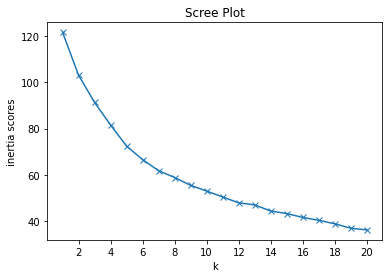

In [50]:
# K means clustering
from sklearn.cluster import KMeans

# search models over a range of K clusters
K = range(1, 21)
inerts = []

# run and store models
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X2_scaled)
    inerts.append(kmeans.inertia_)

# build scree plot
plt.plot(K, inerts, marker='x')
plt.xlabel('k')
plt.ylabel('inertia scores')
plt.title('Scree Plot')
plt.xticks(np.arange(2, 21, step=2))
plt.show()

It starts to flatten out at around 6 clusters. Based on this 5-7 clusters might be the best solution or at lest it captures most of the data.

In [51]:
# define function to get top features for each cluster
def get_top_features_cluster(data, prediction, n_feats):
    labels = np.unique(prediction)
    overall_x_means = np.mean(tmp, axis = 0) # returns average scores across all observations
    feats = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        cluster_means = np.mean(data.loc[id_temp], axis = 0) # returns average scores w/i cluster
        diff_means = (cluster_means - overall_x_means) / overall_x_means
        sorted_means = np.argsort(diff_means)[::-1][:n_feats] # indices with top 20 scores
        features = data.columns
        best_features = [(features[i], diff_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        feats.append(df)
    return feats

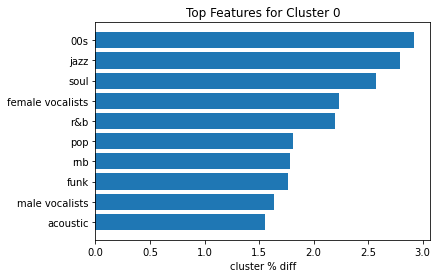

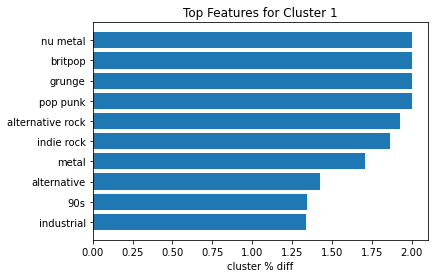

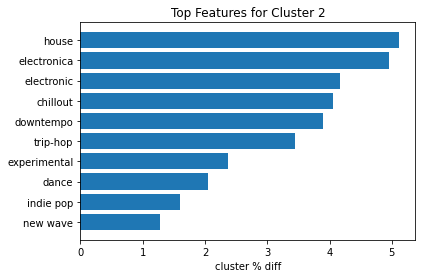

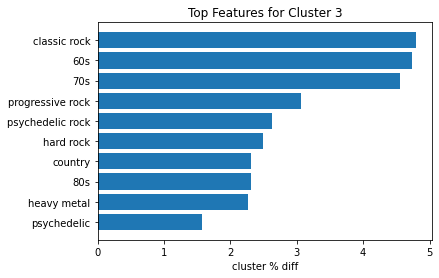

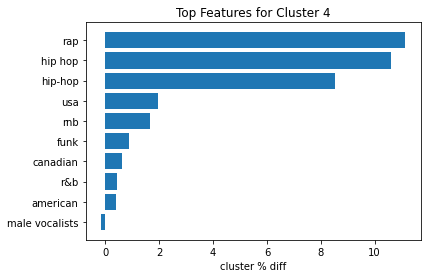

In [68]:
# generate a specific model
k = 5   # set the number of clusters
kmeans = KMeans(n_clusters = k).fit(X2_scaled)
prediction = kmeans.predict(X2_scaled)

# retrieve features
# first, put numpy array back into dataframe to conform to function
tmp = pd.DataFrame(X2_scaled, columns=cols)
tmp.describe()
feats = get_top_features_cluster(tmp, prediction, 10)

# graph results
for clnum in range(0, len(feats)):
    cluster = feats[clnum]
    cluster.sort_values(by='score', inplace=True)
    plt.barh(cluster.features, cluster.score)
    tstr = 'Top Features for Cluster ' + str(clnum)
    plt.title(tstr)
    plt.xlabel('cluster % diff')
    plt.show()

- Cluster 0: is Jazz, R&B, Pop music 
- Cluster 1: is rock/metal music cluster 
- Cluster 2: is new generation music like house, and electric 
- Cluster 3: is most classical rock and old school 
- Cluster 4: is Rap and north American hip hop music


In [72]:
# examine distribution of clusters
df2 = pd.concat([pd.Series(prediction, name='cluster'), df], axis=1)
print(df2.cluster.value_counts())


1    51
0    39
3    26
2    25
4    12
Name: cluster, dtype: int64


Cluster 1 which was rock and metal music has the most amount of artist in it, followed by Cluster 0 which is jazz, pop, and R&B. Cluster 4 had the lest amount of artists which was Rap music. 

In [71]:
# get list of records for each cluster
cl_list = sorted(list(df2.cluster.unique()))
for i in cl_list:
    print('\ncluster', i, ':', df2[df2.cluster==i].artist.nunique(), 'records\n', 
          sorted(list(df2[df2.cluster==i].artist.unique())))


cluster 0 : 39 records
 ['Adele', 'Alicia+Keys', 'Amy+Winehouse', 'Aretha+Franklin', 'Ariana+Grande', 'Beyonce', 'Britney+Spears', 'Bruno+Mars', 'Carly+Rae+Jepsen', 'Charlie+Puth', 'Demi+Lovato', 'Dua+Lipa', 'Ed+Sheeran', 'Frank+Ocean', 'Frank+Sinatra', 'Halsey', 'Jason+Mraz', 'John+Legend', 'Justin+Bieber', 'Justin+Timberlake', 'Katy+Perry', 'Lady+Gaga', 'Lana+Del+Rey', 'Lorde', 'Madonna', 'Mariah+Carey', 'Mark+Ronson', 'Marvin+Gaye', 'Michael+Jackson', 'Miley+Cyrus', 'Nina+Simone', 'Rihanna', 'Sam+Smith', 'Selena+Gomez', 'Shakira', 'Shawn+Mendes', 'Sia', 'Stevie+Wonder', 'Taylor+Swift']

cluster 1 : 51 records
 ['30+Seconds+to+Mars', 'Arcade+Fire', 'Arctic+Monkeys', 'Beck', 'Blur', 'Bon+Iver', 'Coldplay', 'Disturbed', 'Evanescence', 'Foo+Fighters', 'Gorillaz', 'Green+Day', 'Hozier', 'Imagine+Dragons', 'Kings+of+Leon', 'Korn', 'Limp+Bizkit', 'Linkin+Park', 'Marilyn+Manson', 'Maroon+5', 'Metallica', 'Muse', 'Nickelback', 'Nirvana', 'Oasis', 'OneRepublic', 'Paramore', 'Pearl+Jam', 'Pix

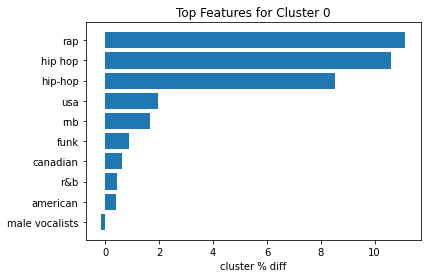

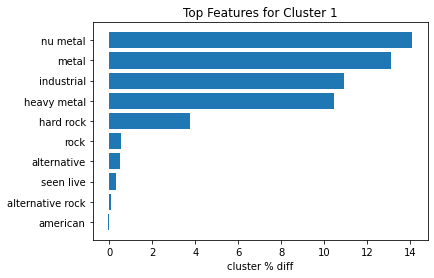

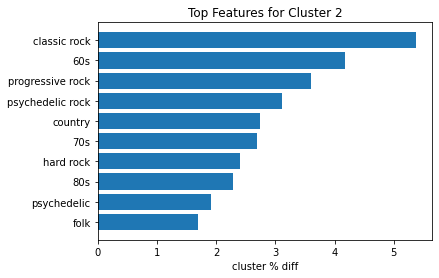

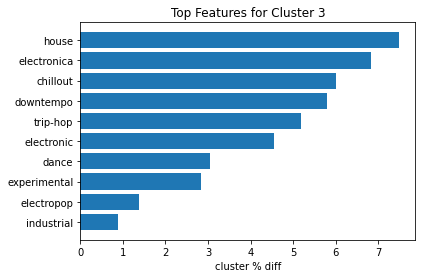

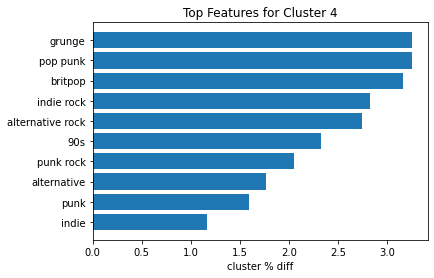

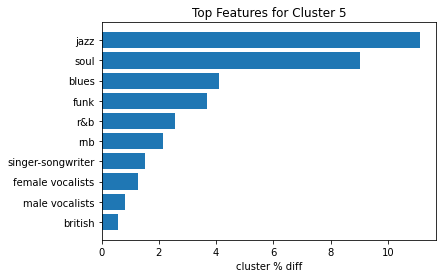

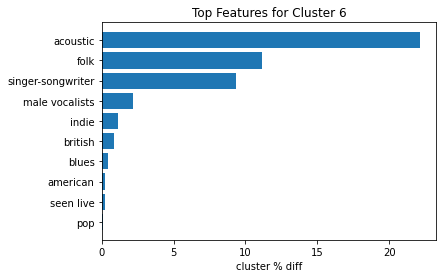

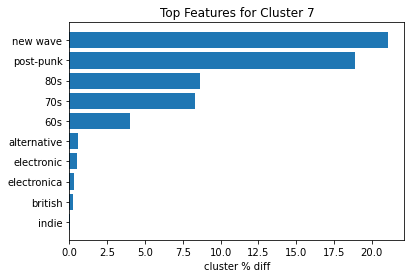

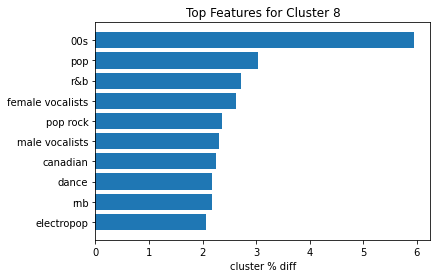

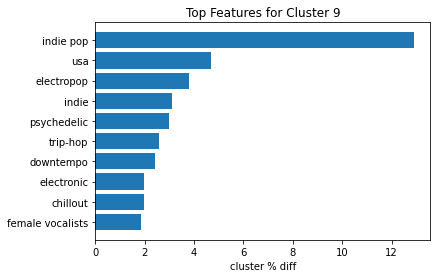

In [73]:
# generate a specific model
k = 10   # set the number of clusters
kmeans = KMeans(n_clusters = k).fit(X2_scaled)
prediction = kmeans.predict(X2_scaled)

# retrieve features
# first, put numpy array back into dataframe to conform to function
tmp = pd.DataFrame(X2_scaled, columns=cols)
tmp.describe()
feats = get_top_features_cluster(tmp, prediction, 10)

# graph results
for clnum in range(0, len(feats)):
    cluster = feats[clnum]
    cluster.sort_values(by='score', inplace=True)
    plt.barh(cluster.features, cluster.score)
    tstr = 'Top Features for Cluster ' + str(clnum)
    plt.title(tstr)
    plt.xlabel('cluster % diff')
    plt.show()

When we increase the number of clusters we get differen oucome of cluster characteristics. 

- Cluster 0: Rap & Hip-hop 
- Cluster 1: Metal / Rock 
- Cluster 2: Classic rock 
- Cluster 3: House / electric 
- Cluster 4: Grunge / Punk rock 
- Cluster 5: Jazz, Soul and Funk 
- Cluster 6: Acoustic & Folk 
- Cluster 7: New wave
- Cluster 8: 2000's pop
- Cluster 9: Indie

When we have more clusters the categories are more clean and relatable.


In [74]:
# examine distribution of clusters
df2 = pd.concat([pd.Series(prediction, name='cluster'), df], axis=1)
print(df2.cluster.value_counts())


4    36
2    23
8    22
3    18
0    12
5    12
1    10
9     9
7     6
6     5
Name: cluster, dtype: int64


Cluster 4 which is Grunge had the most artists in the cluster. Accoustic and Folk had the least. There is definetly a lot of differenmt rock clusters.

In [75]:
# get list of records for each cluster
cl_list = sorted(list(df2.cluster.unique()))
for i in cl_list:
    print('\ncluster', i, ':', df2[df2.cluster==i].artist.nunique(), 'records\n', 
          sorted(list(df2[df2.cluster==i].artist.unique())))


cluster 0 : 12 records
 ['2Pac', 'Childish+Gambino', 'Chris+Brown', 'Drake', 'Eminem', 'Jay-Z', 'Kanye+West', 'Kendrick+Lamar', 'Lil+Wayne', 'Nicki+Minaj', 'OutKast', 'Post+Malone']

cluster 1 : 10 records
 ['Black+Sabbath', 'Disturbed', 'Korn', 'Limp+Bizkit', 'Linkin+Park', 'Marilyn+Manson', 'Metallica', 'Rammstein', 'Slipknot', 'System+of+a+Down']

cluster 2 : 23 records
 ['AC/DC', 'Aerosmith', 'Bob+Dylan', 'Bruce+Springsteen', 'David+Bowie', 'Dire+Straits', 'Elton+John', 'Elvis+Presley', 'Fleetwood+Mac', 'Johnny+Cash', 'Led+Zeppelin', 'Phil+Collins', 'Pink+Floyd', 'Queen', 'Scorpions', 'Sting', 'The+Beach+Boys', 'The+Beatles', 'The+Clash', 'The+Doors', 'The+Police', 'The+Rolling+Stones', 'U2']

cluster 3 : 18 records
 ['Air', 'Alan+Walker', 'Avicii', 'Bonobo', 'Calvin+Harris', 'Clean+Bandit', 'DJ+Snake', 'Daft+Punk', 'David+Guetta', 'Disclosure', 'Kygo', 'M83', 'Major+Lazer', 'Massive+Attack', 'Moby', 'The+Chainsmokers', 'The+Prodigy', 'The+Weeknd']

cluster 4 : 36 records
 ['30+Se

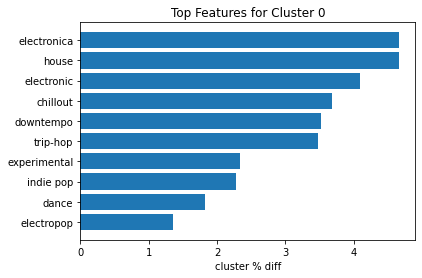

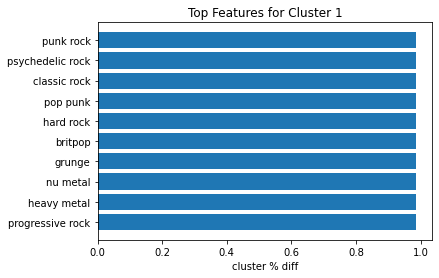

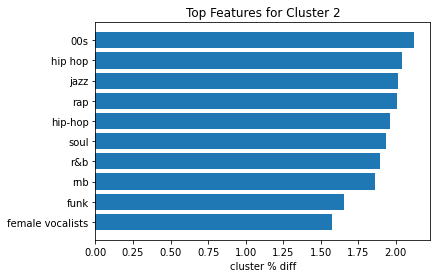

In [77]:
# generate a specific model
k = 3   # set the number of clusters
kmeans = KMeans(n_clusters = k).fit(X2_scaled)
prediction = kmeans.predict(X2_scaled)

# retrieve features
# first, put numpy array back into dataframe to conform to function
tmp = pd.DataFrame(X2_scaled, columns=cols)
tmp.describe()
feats = get_top_features_cluster(tmp, prediction, 10)

# graph results
for clnum in range(0, len(feats)):
    cluster = feats[clnum]
    cluster.sort_values(by='score', inplace=True)
    plt.barh(cluster.features, cluster.score)
    tstr = 'Top Features for Cluster ' + str(clnum)
    plt.title(tstr)
    plt.xlabel('cluster % diff')
    plt.show()

After decreasing the number of clusers to just 3, the cluster are very mixed in terms of music genre. 

- Cluster 0: Electronic / House 
- Cluster 1: all types of rock 
- Cluster 2: 2000's, hip hot, rap, r&b, pop



In [79]:
# examine distribution of clusters
df2 = pd.concat([pd.Series(prediction, name='cluster'), df], axis=1)
print(df2.cluster.value_counts())


1    77
2    49
0    27
Name: cluster, dtype: int64


Rock music by far has the most artist, while house and electronic category has the least amount of artists. 

Hierartecal vs K-means

- From the output from both screen graphs. Hierartecal is best with 5 or 8 cluster numbers as they provide the most pay off, and it still covers enough data but stopes befor the screen line starts to flatten out. The K-means screen graphs shows that the best number of clusters is around 5-7 before the line starts to flatten out. Based on the above analysis I would say K- means is more robust as it provides greater detail into clustering and categories being put togther. While its easier to decide on number of clusters in hierartecal algorith, K-means provides more flexibility in chaging clusters. 



Conclusion: 

- I would say that rock music is by far the most popular music genre, it had the most amout of artists across different number of cluster conbinations. House and Electic music had small amount of artistist compare to other groups but it still always showed up as a category as the number of clusters was changed. In this case a "Blue Ocean" opportunity would be to be an artist in a new category. I would say in this dataset rappers are underresprensted compared to rock artists. Also I havent seen k-pop which is a huge growing music genre. Lastly, while it seems that House music is popular it there is still a lot of space for more artists compare to rock and pop music categories. 